<a href="https://colab.research.google.com/github/mk9652064965/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables 

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

Data Description 

Demographic: 

• Sex: male or female("M" or "F") 

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral 

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current) 

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous) 

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous) 

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose: glucose level (Continuous) 

Predict variable (desired target) 

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import time
import random 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

from shapely.geometry import Point,Polygon
import descartes

In [275]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [276]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

In [277]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [278]:
data.shape

(3390, 17)

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [280]:
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

It shows the number of np.nan or null values or missing values are present in the dataset:

education: 87

cigsPerDay: 22

BPMeds: 44

totChol: 38

BMI: 14

heartRate: 1

glucose: 304

In [281]:
data.duplicated().sum()

0

It shows that there are no Duplicated Values present in the dataset.

In [282]:
print((data["glucose"].mode())[0])

75.0


In [283]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

Filling the missing spaces of glucosecolumn with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset

In [284]:
data.dropna(inplace=True)
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Dropping all other rows containing missing values

In [285]:
data.drop(['id',],axis=1,inplace=True)

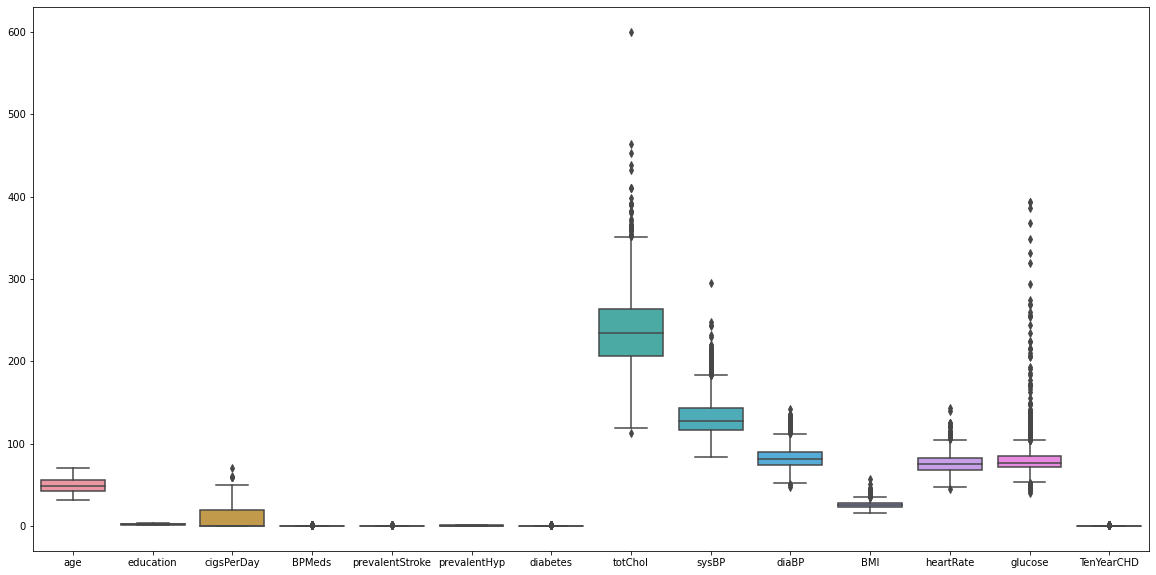

In [286]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

In [287]:
data.head(3)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1


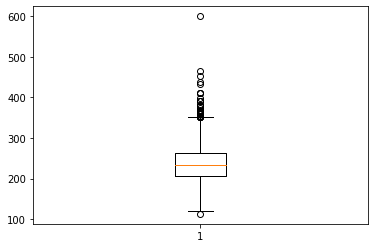

In [288]:
plt.boxplot(data["totChol"])
plt.show()

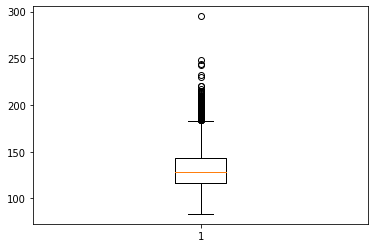

In [289]:
plt.boxplot(data["sysBP"])
plt.show()

In [290]:
data['totChol'].describe()

count    3189.000000
mean      236.968642
std        44.537998
min       113.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       600.000000
Name: totChol, dtype: float64

In [291]:
data['sysBP'].describe()

count    3189.000000
mean      132.436344
std        22.176848
min        83.500000
25%       117.000000
50%       128.000000
75%       143.500000
max       295.000000
Name: sysBP, dtype: float64

Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.

In [292]:
data = data[data['totChol']<340.0]
data = data[data['totChol']>120.0]
data = data[data['sysBP']<170.0]

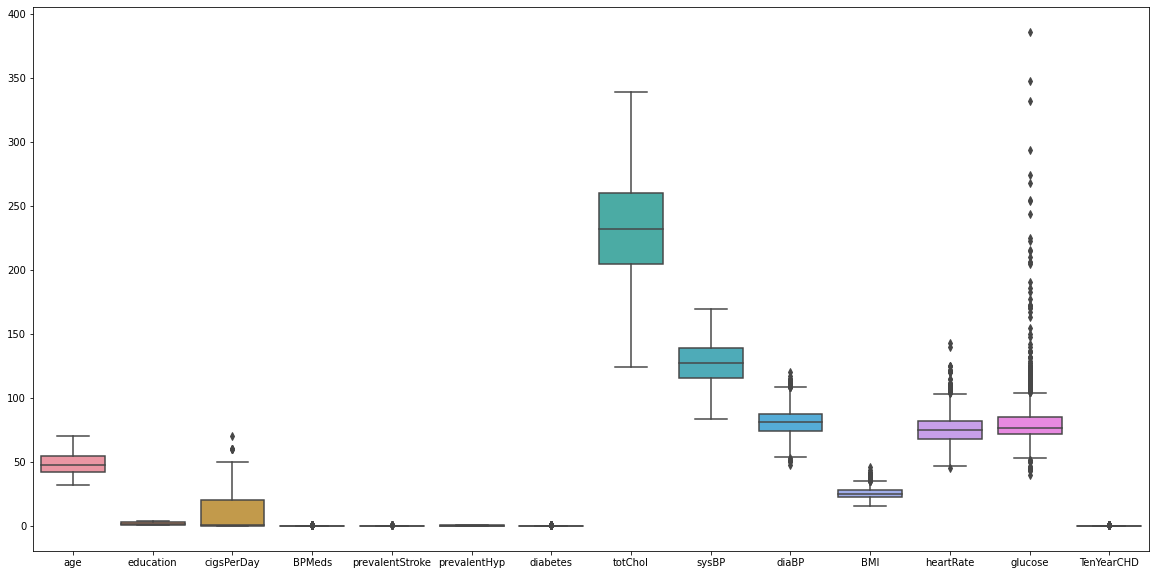

In [293]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

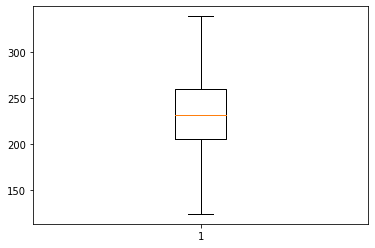

In [294]:
plt.boxplot(data["totChol"])
plt.show()

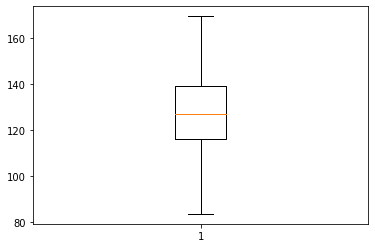

In [295]:
plt.boxplot(data["sysBP"])
plt.show()

Now with the missing values, outliers and duplicate values dealt with, we proceed to perform EDA

**Exploratory Data Analysis**